# StudiaxDSI Case Study

## About Me

### Hafizh Yuwan Fauzan

Data enthusiasts graduated from Information System at the University of Brawijaya. Highly interested in everything about data, as my thesis consists of Data Mining and Process Mining method to extract information from academic data. Feel free to contact me if you're interested in working with me, adiós.

- LinkedIn: https://www.linkedin.com/in/hafizhyuwan/
- GitHub: https://github.com/hayufa12
- Email: hayeef8@gmail.com

## Studi Kasus

Selama pandemic COVID-19 pada tahun 2020, total peningkatan penjualan di e-commerce meningkat hingga 37%. Karena persaingan antar kompetitor yang semakin ketat, kamu dan Product Manager-mu sedang melakukan diskusi terkait bagaimana cara agar tetap bertahan dan bersaing di industri e-commerce. Setelah itu, kalian memutuskan untuk membuat suatu inovasi atau penawaran agar users tetap memilih kalian sebagai media belanja onlinenya.

Untuk itu, kamu ditugaskan untuk melakukan analisis terkait transaksi dari data pengguna baru. Akan tetapi, permasalahannya adalah perusahaan sedang melakukan efisiensi terkait pengelolaan dana promosi di 2021. Sebagai seorang data analyst, insights dan rekomendasi apa yang dapat kamu berikan untuk perusahaan tersebut?

## Data Set

- Data set yang digunakan merupakan open data dari Kaggle.
- Kolom Country tidak perlu dihiraukan untuk kasus ini
- Tahun di kolom InvoiceDate perlu diganti ke tahun 2020 sampai 2021 untuk kasus ini
- Data dalam kolom UnitPrice dalam US dollar
- Kamu bisa menggunakan data pendukung atau asumsi yang dapat dijustifikasi

## Petunjuk Pengerjaan

1. Unduh data set dari tautan di atas. Olah data menggunakan software pilihanmu; bisa menggunakan excel, pandas, atau tools lainnya.
2. Tentukan problem statement dari studi kasus diatas.
3. Buat story-telling berdasarkan asumsi dan masalah yang kamu temukan.
4. Buat visualisasi data atas permasalahan yang ingin kamu angkat untuk meyakinkan Product Manager-mu atas rekomendasimu.
5. Tulis rekomendasimu dengan konkrit.
6. Kamu boleh menyusun solusi case study ini dalam format PDF.

## Pengumpulan

1. File yg akan diupload dibuat dengan format nama file:
Studia x DSI - [Nama Lengkap].pdf
2. Kumpulkan tugasmu sebelum tanggal 21 Februari 2021 23.59 WIB ke link berikut: http://bit.ly/StudiaxDSIcasestudysubmission
3. Submisi yang menarik akan direview oleh Data Analyst Traveloka dan APM Pinhome.
4. Submisi terbaik akan di post di medium Data Science Indonesia.
5. Apabila ada yang ingin kamu tanyakan terkait studi kasus atau webinar, bisa mengirimkan email ke: talktostudia@gmail.com

## Planning

1. Data Visualization and Insight Searching
2. Customer Behavioral Segmentation for different treatment
3. Market Basket Analysis & Product Recommendation

## Importing the Neccessary Library

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
sns.set_style('whitegrid')
df = pd.read_csv('data.csv', header=0, encoding= 'unicode_escape')

## Data Preprocessing

In [2]:
df.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
del df['Country']

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.replace(year = x.year + 10))

In [5]:
df['InvoiceDate'].head()

0   2020-12-01 08:26:00
1   2020-12-01 08:26:00
2   2020-12-01 08:26:00
3   2020-12-01 08:26:00
4   2020-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [6]:
df=df.drop(df[df['UnitPrice']<=0].index)
df=df.drop(df[df['Quantity']<=0].index)

In [7]:
df['UnitPrice'].min()

0.001

In [8]:
df['Quantity'].min()

1

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df['CustomerID']=df['CustomerID'].astype('int')

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [13]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  
0 2020-12-01 08:26:00       2.55       17850  
1 2020-12-01 08:26:00       3.39       17850  
2 2020-12-01 08:26:00       2.75       17850  
3 2020-12-01 08:26:00       3.39       17850  
4 2020-12-01 08:26:00       3.39       17850

## Univariate Analysis

### 1) Customer that generate the most revenue

In [14]:
df['Total'] = df['Quantity']*df['UnitPrice']

In [15]:
df_cust = df.groupby('CustomerID').Total.sum()

Text(0, 0.5, 'Total Belanjaan (USD)')

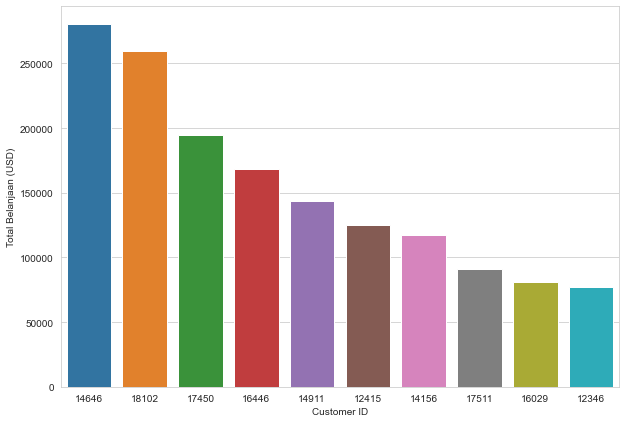

In [16]:
plt.figure(figsize=[10,7])
sns.barplot(y=df_cust.sort_values(ascending=False).iloc[:10].values,x=df_cust.sort_values(ascending=False).iloc[:10].index,order=df_cust.sort_values(ascending=False).iloc[:10].index)
plt.xlabel('Customer ID')
plt.ylabel('Total Belanjaan (USD)')

Grafik diatas merupakan 10 customer yang membeli barang dengan total belanjaan terbanyak. Sebagai contoh, customer dengan ID 14646 membeli dengan total lebih dari 250000 USD atau setara dengan 3.4 Milliar Rupiah. Oleh karena itu beberapa customer yang sangat menguntungkan dapat diberikan reward/bonus agar lebih banyak lagi dalam membeli produk.

### 2)  Commodities that generate the most revenue

In [17]:
df_prod = df.groupby('Description').Total.sum()

Text(0.5, 0, 'Total Belanjaan (USD)')

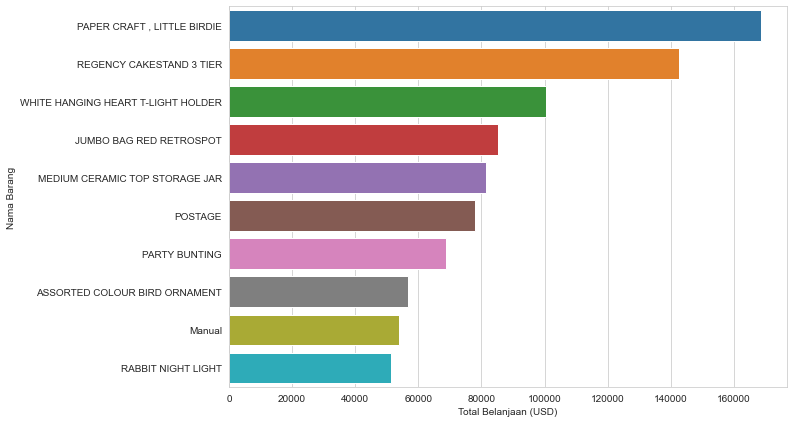

In [18]:
plt.figure(figsize=[10,7])
sns.barplot(x=df_prod.sort_values(ascending=False).iloc[:10].values,
            y=df_prod.sort_values(ascending=False).iloc[:10].index,
            order=df_prod.sort_values(ascending=False).iloc[:10].index)
plt.ylabel('Nama Barang')
plt.xlabel('Total Belanjaan (USD)')

Grafik diatas menunjukkan barang - barang apa saja yang paling banyak menghasilkan keuntungan kotor. Strategi yang bisa diambil manajer adalah sebagai berikut: 
1. Membuat paket barang yang laku dan tidak laku
2. Promosi untuk barang - barang yang bertipe sama dengan barang yang termasuk kedalam grafik diatas
3. Memberikan potongan menarik atau promo dengan pembelian barang diatas

In [19]:
df[df['Description'].str.contains('LIGHT')].groupby('Description').Total.sum()

Description
 TOADSTOOL BEDSIDE LIGHT                 17.90
15CM CHRISTMAS GLASS BALL 20 LIGHTS    9374.70
6 CHOCOLATE LOVE HEART T-LIGHTS        1994.26
ADULT APRON APPLE DELIGHT               896.88
AGED GLASS SILVER T-LIGHT HOLDER       6083.20
                                        ...   
ZINC HEART LATTICE T-LIGHT HOLDER       785.47
ZINC STAR T-LIGHT HOLDER                 10.00
ZINC T-LIGHT HOLDER STAR LARGE         1896.54
ZINC T-LIGHT HOLDER STARS LARGE          22.80
ZINC T-LIGHT HOLDER STARS SMALL        3879.98
Name: Total, Length: 160, dtype: float64

### 3) Time Graph for Revenue

In [20]:
df_date=df.resample('W', on='InvoiceDate').Total.sum()

In [21]:
df_date=df_date.to_frame()

In [22]:
df_date.reset_index(level=0, inplace=True)

In [23]:
df_date['date_ordinal'] = pd.to_datetime(df_date['InvoiceDate']).apply(lambda date: date.toordinal())

[Text(0, 0, '2020-11-21'),
 Text(0, 0, '2021-01-10'),
 Text(0, 0, '2021-03-01'),
 Text(0, 0, '2021-04-20'),
 Text(0, 0, '2021-06-09'),
 Text(0, 0, '2021-07-29'),
 Text(0, 0, '2021-09-17'),
 Text(0, 0, '2021-11-06'),
 Text(0, 0, '2021-12-26')]

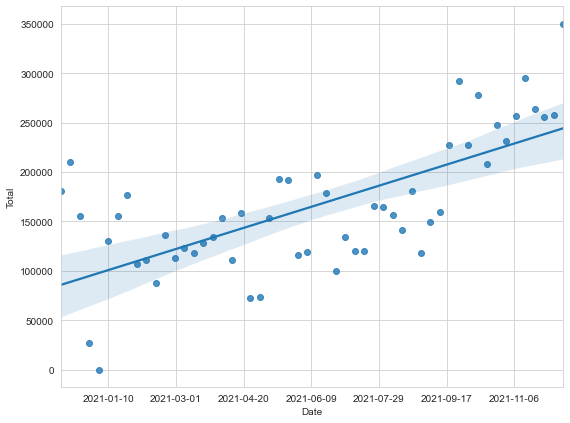

In [24]:
plt.figure(figsize=[9,7])
ax = sns.regplot(
    data=df_date,
    x='date_ordinal',
    y='Total',
)
ax.set_xlabel('Date')
new_labels = [dt.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

Grafik diatas menunjukkan revenue per minggu pada perusahaan. Apabila kita melihat garis trendnya, walaupun terdapat penurunan revenue diawal tahun 2021, akan tetapi setelah itu trend selalu meningkat hingga mencapai puncaknya di akhir tahun 2021. Jika sesuai dengan trend line maka pada tanggal - tanggal berikutnya kemungkinan revenue masih tetap meningkat, apabila tidak terdapat variabel ekstrim.

## Customer Behavioral Segmentation using RFM Model

### Creating the DataFrame

In [25]:
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [26]:
df_rfm = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'})

In [27]:
df_rfm.head()

InvoiceDate  InvoiceNo     Total
CustomerID                                  
12346               326          1  77183.60
12347                 2        182   4310.00
12348                75         31   1797.24
12349                19         73   1757.55
12350               310         17    334.40

In [28]:
df_rfm.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total': 'MonetaryValue'}, inplace=True)

In [29]:
df_rfm.head()

Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             2        182        4310.00
12348            75         31        1797.24
12349            19         73        1757.55
12350           310         17         334.40

In [30]:
df_rfm.profile_report()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Making the data into a normal shape / Reduce the skewness

In [31]:
from scipy import stats
df_rfm["Recency"] = stats.boxcox(df_rfm['Recency'])[0]
df_rfm["Frequency"] = stats.boxcox(df_rfm['Frequency'])[0]
df_rfm["MonetaryValue"] = pd.Series(np.cbrt(df_rfm['MonetaryValue'])).values

In [32]:
df_rfm.profile_report()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Scaling the Data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_rfm)
df_rfm_final = scaler.transform(df_rfm)
print(df_rfm_final.mean(axis = 0).round(2)) # [0. -0. 0.]
print(df_rfm_final.std(axis = 0).round(2)) # [1. 1. 1.]

[0. 0. 0.]
[1. 1. 1.]


### Building the Model

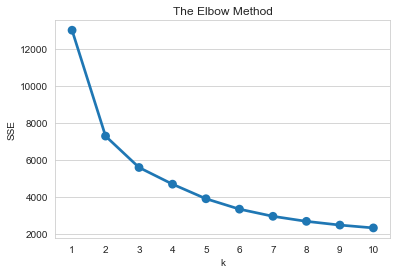

In [34]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_rfm_final)
    sse[k] = kmeans.inertia_ 
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [35]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_rfm_final)
model.labels_.shape

(4338,)

In [36]:
df_rfm["Cluster"] = model.labels_
df_rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          8.14      2.77          6.79  1648
1          4.65      4.40          9.57  1922
2          2.98      6.24         17.32   768

### Showing the Model

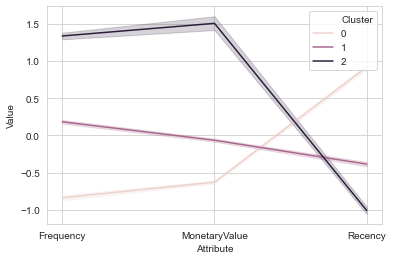

In [37]:
df_normalized = pd.DataFrame(df_rfm_final, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = df_rfm.index
df_normalized['Cluster'] = model.labels_
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

### Insight from the Model

Apabila kita melihat grafik diatas dapat disimpulkan bahwa:
1. Cluster 0 merupakan cluster dengan frekuensi yang rendah, menghabiskan uang yang rendah, dan membeli pada waktu yang sudah lama, berarti cluster ini merupakan cluster dengan pelanggan yang kurang bernilai.
2. Cluster 1 merupakan cluster dengan frekuensi pembelian yang lumayan, menghabiskan uang dengan lumayan, tetapi membeli pada waktu yang baru - baru ini, berarti cluster dengan pelanggan baru.
3. Cluster 2 merupakan cluster dengan frekuensi pembelian yang tinggi, menghabiskan uang dengan tinggi, dan membeli pada waktu yang baru - baru ini, berarti cluster dengan pelanggan terbaik.

Dengan adanya kesimpulan tersebut dapat manajer dapat menghabiskan promosi kepada pelanggan pada cluster 1 atau pelanggan baru. Hal ini dikarenakan pengeluaran promosi akan menjadi tidak efektif apabila digunakan pada pelanggan terbaik ataupun pelanggan yang kurang bernilai.

## Market Basket Analysis

In [38]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [39]:
df_mb = df

In [40]:
df_mb['Description'] = df_mb['Description'].str.strip()
df_mb.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df_mb['InvoiceNo'] = df_mb['InvoiceNo'].astype('str')

In [41]:
df_mb = (df_mb.groupby(['InvoiceNo', 'Description'])['Quantity']
         .sum().unstack().reset_index().fillna(0)
         .set_index('InvoiceNo'))

In [42]:
df_mb.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                          0.0                         0.0   
536366                          0.0                         0.0   
536367                          0.0                         0.0   
536368                          0.0                         0.0   
536369                          0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                             0.0                        0.0   
536366                             0.0                        0.0   
536367                             0.0                        0.0   
536368                             0.0                        0.0   
536369                             0.0                        0.0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                0.0                               0.0   
536366                                0.0                               0.0   
536367                                0.0                               0.0   
536368                                0.0                               0.0   
536369                                0.0                               0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                   0.0                            0.0   
536366                                   0.0                            0.0   
536367                                   0.0                            0.0   
536368                                   0.0                            0.0   
536369                                   0.0                            0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365                                       0.0                          0.0   
536366                                       0.0                          0.0   
536367                                       0.0                          0.0   
536368                                       0.0                          0.0   
536369                                       0.0                          0.0   

Description  ...  ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH  \
InvoiceNo    ...                                                        
536365       ...                       0.0                        0.0   
536366       ...                       0.0                        0.0   
536367       ...                       0.0                        0.0   
536368       ...                       0.0                        0.0   
536369       ...                       0.0                        0.0   

Description  ZINC SWEETHEART WIRE LETTER RACK  ZINC T-LIGHT HOLDER STAR LARGE  \
InvoiceNo                                                                       
536365                                    0.0                             0.0   
536366                                    0.0                             0.0   
536367                                    0.0                             0.0   
536368                                    0.0                             0.0   
536369                                    0.0                             0.0   

Description  ZINC T-LIGHT HOLDER STARS LARGE  ZINC T-LIGHT HOLDER STARS SMALL  \
InvoiceNo                                                                       
536365                                   0.0                              0.0   
536366                                   0.0   

In [43]:
def convert(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_mb = df_mb.applymap(convert)
df_mb.drop('POSTAGE', inplace=True, axis=1)

In [44]:
frequent_itemsets = apriori(df_mb, min_support=0.02, use_colnames=True)

In [45]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

antecedents                   consequents  \
0    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
2    (ALARM CLOCK BAKELIKE RED)   (ALARM CLOCK BAKELIKE PINK)   
3   (ALARM CLOCK BAKELIKE PINK)    (ALARM CLOCK BAKELIKE RED)   
4        (DOLLY GIRL LUNCH BOX)          (SPACEBOY LUNCH BOX)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.047324            0.042575  0.028599    0.604333  14.194548   
1            0.042575            0.047324  0.028599    0.671736  14.194548   
2            0.047324            0.033078  0.021368    0.451539  13.650778   
3            0.033078            0.047324  0.021368    0.646003  13.650778   
4            0.033240            0.037988  0.022879    0.688312  18.119023   

   leverage  conviction  
0  0.026584    2.419774  
1  0.026584    2.902169  
2  0.019803    1.762974  
3  0.019803    2.691201  
4  0.021617    3.086454

In [46]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.6) ].sort_values(by='confidence', ascending=False)

antecedents  \
71  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
70  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
8                    (PINK REGENCY TEACUP AND SAUCER)   
62                   (PINK REGENCY TEACUP AND SAUCER)   
12                  (GREEN REGENCY TEACUP AND SAUCER)   
7                 (GARDENERS KNEELING PAD CUP OF TEA)   
72  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...   
73                   (PINK REGENCY TEACUP AND SAUCER)   
13                  (ROSES REGENCY TEACUP AND SAUCER)   
4                              (DOLLY GIRL LUNCH BOX)   
1                        (ALARM CLOCK BAKELIKE GREEN)   
64                 (RED HANGING HEART T-LIGHT HOLDER)   
9                   (GREEN REGENCY TEACUP AND SAUCER)   
59                (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
3                         (ALARM CLOCK BAKELIKE PINK)   
18                             (JUMBO BAG STRAWBERRY)   
17                          (JUMBO BAG PINK POLKADOT)   
6                  (GARDENERS KNEELING PAD KEEP CALM)   
0                          (ALARM CLOCK BAKELIKE RED)   
5                                (SPACEBOY LUNCH BOX)   

                                          consequents  antecedent support  \
71                  (GREEN REGENCY TEACUP AND SAUCER)            0.023527   
70                  (ROSES REGENCY TEACUP AND SAUCER)            0.024822   
8                   (GREEN REGENCY TEACUP AND SAUCER)            0.030002   
62                  (ROSES REGENCY TEACUP AND SAUCER)            0.030002   
12                  (ROSES REGENCY TEACUP AND SAUCER)            0.037287   
7                  (GARDENERS KNEELING PAD KEEP CALM)            0.034265   
72                   (PINK REGENCY TEACUP AND SAUCER)            0.029193   
73  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...            0.030002   
13                  (GREEN REGENCY TEACUP AND SAUCER)            0.042251   
4                                (SPACEBOY LUNCH BOX)            0.033240   
1                          (ALARM CLOCK BAKELIKE RED)            0.042575   
64               (WHITE HANGING HEART T-LIGHT HOLDER)            0.036639   
9                    (PINK REGENCY TEACUP AND SAUCER)            0.037287   
59                   (PAPER CHAIN KIT 50'S CHRISTMAS)            0.037611   
3                          (ALARM CLOCK BAKELIKE RED)            0.033078   
18                          (JUMBO BAG RED RETROSPOT)            0.035290   
17                          (JUMBO BAG RED RETROSPOT)            0.047000   
6                 (GARDENERS KNEELING PAD CUP OF TEA)            0.040794   
0                        (ALARM CLOCK BAKELIKE GREEN)            0.047324   
5                              (DOLLY GIRL LUNCH BOX)            0.037988   

    consequent support   support  confidence       lift  leverage  conviction  
71            0.037287  0.021045    0.894495  23.989564  0.020167    9.124846  
70            0.042251  0.021045    0.847826  20.066300  0.019996    6.293778  
8             0.037287  0.024822    0.827338  22.188466  0.023703    5.575714  
62            0.042251  0.023527    0.784173  18.559754  0.022259    4.437569  
12            0.042251  0.029193    0.782923  18.530185  0.027617    4.412029  
7             0.040794  0.024984    0.729134  17.873424  0.023586    3.541254  
72            0.030002  0.021045    0.720887  24.027846  0.020169    3.475290  
73            0.029193  0.021045    0.701439  24.027846  0.020169    3.251619  
13            0.037287  0.029193    0.690932  18.530185  0.027617    3.114894  
4             0.037988  0.022879    0.688312  18.119023  0.021617    3.086454  
1             0.047324  0.028599    0.671736  14.194548  0.026584    2.902169  
64            0.106357  0.024552    0.670103   6.300533  0.020655    2.708857  
9             0.030002  0.024822    0.665702  22.188466  0.023703    2.901595  
59            0.052882  0.024336    0.647059  12.236014  0.022347    2.683502  
3             0.047324  0.

Dengan melakukan market basket analysis kita dapat melakukan beberapa strategi seperti berikut:
1. Membuat cross selling dengan product yang memiliki confidence dan support yang mencukupi atau product recommendation.
2. Dengan menggelintirkan dana promosi untuk membuat paket/diskon berdasarkan produk yang sudah terbukti memiliki confidence dan support yang baik.

## Summary

Setelah melakukan beberapa analisis dapat disimpulkan pilihan terbaik untuk alokasi modal promosi ada beberapa opsi sebagai berikut:
1. Beberapa customer yang sangat menguntungkan dapat diberikan reward/bonus agar lebih banyak lagi dalam membeli produk. Informasi ini terdapat pada Univariate analysis yang pertama.
2. Membuat paket barang yang laku dan tidak laku. Informasi ini terdapat pada Univariate analysis yang kedua. 
3. Promosi untuk barang - barang yang bertipe sama dengan barang yang termasuk kedalam grafik. Informasi ini terdapat pada Univariate analysis yang kedua.
4. Memberikan potongan menarik atau promo dengan pembelian barang yang sudah tertera pada grafik. Informasi ini terdapat pada Univariate analysis yang kedua.
5. Dengan adanya kesimpulan pada Customer behavioral analysis manajer dapat mengalokasikan promosi kepada pelanggan pada cluster 1 atau pelanggan baru. Hal ini dikarenakan pengeluaran promosi akan menjadi tidak efektif apabila digunakan pada pelanggan terbaik ataupun pelanggan yang kurang bernilai.
6. Membuat cross selling dengan product yang memiliki confidence dan support yang mencukupi atau product recommendation. Informasi ini terdapat pada Market Basket Analysis.
7. Dengan menggelintirkan dana promosi untuk membuat paket/diskon berdasarkan produk yang sudah terbukti memiliki confidence dan support yang baik. Informasi ini terdapat pada Market Basket Analysis.